In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.callbacks import EarlyStopping
from math import sqrt

In [2]:
# Function to get stock data from Yahoo Finance
def get_stock_data(symbol):
    stock_data = yf.download(symbol)
    
    # Plot Close Price
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data.index, stock_data['Close'], label='Close Price')
    plt.title(f'{symbol} Close Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return stock_data.index, stock_data['Adj Close'].values.reshape(-1, 1)

In [3]:
# Function to create sequences for training
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        target = data[i + seq_length]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

In [4]:
# Function to plot actual vs. predicted values
def plot_predictions_with_dates(dates, actual, predicted, title):
    plt.figure(figsize=(10, 6))
    plt.plot(dates, actual.flatten(), label='Actual')  # Flatten the actual array
    plt.plot(dates, predicted.flatten(), label='Predicted')  # Flatten the predicted array
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

In [5]:
# Define stock symbols and date range
symbols = ['AAPL', 'GOOGL', 'MSFT']
start_date = '2020-01-01'
end_date = '2022-01-01'

# Define LSTM parameters
sequence_length = 10

In [17]:
def evaluate_model_performance(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R^2 Score: {r2}")


In [7]:
# Function to forecast future values with an LSTM model
def forecast_future_values(model, scaler, last_sequence, n_future_steps=5):
    future_predictions = []
    current_sequence = last_sequence.copy()
    
    for _ in range(n_future_steps):
        # Reshape the current sequence for prediction
        current_sequence_reshaped = current_sequence[np.newaxis, :, :]
        # Predict the next value
        predicted_next_value = model.predict(current_sequence_reshaped)
        # Inverse transform the predicted value
        predicted_next_value_transformed = scaler.inverse_transform(predicted_next_value)
        # Store the predicted value
        future_predictions.append(predicted_next_value_transformed.ravel()[0])
        # Update the sequence with the predicted value (for the next prediction)
        current_sequence = np.roll(current_sequence, -1, axis=0)
        current_sequence[-1] = predicted_next_value
        
    return np.array(future_predictions)


[*********************100%%**********************]  1 of 1 completed


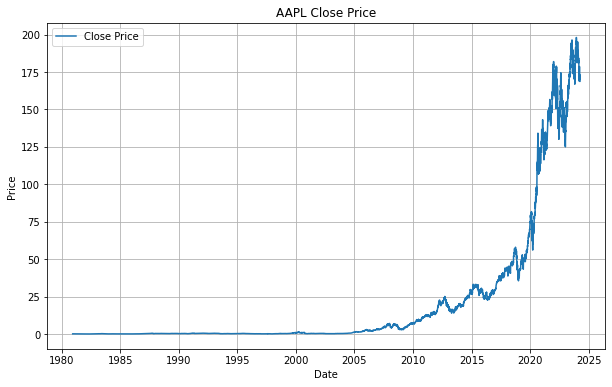

Epoch 1/10
246/246 - 5s - loss: 1.7002e-05 - val_loss: 1.7923e-05 - 5s/epoch - 21ms/step
Epoch 2/10
246/246 - 1s - loss: 3.9818e-06 - val_loss: 2.9573e-05 - 1s/epoch - 5ms/step
Epoch 3/10
246/246 - 1s - loss: 3.7529e-06 - val_loss: 1.4528e-05 - 1s/epoch - 5ms/step
Epoch 4/10
246/246 - 1s - loss: 2.9634e-06 - val_loss: 1.0296e-05 - 1s/epoch - 5ms/step
Epoch 5/10
246/246 - 1s - loss: 3.8645e-06 - val_loss: 1.6180e-05 - 1s/epoch - 5ms/step
Epoch 6/10
246/246 - 1s - loss: 3.3719e-06 - val_loss: 5.9653e-05 - 1s/epoch - 5ms/step
Epoch 7/10
246/246 - 1s - loss: 3.6805e-06 - val_loss: 1.0143e-05 - 1s/epoch - 5ms/step
Epoch 8/10
246/246 - 1s - loss: 2.9413e-06 - val_loss: 9.5069e-06 - 1s/epoch - 5ms/step
Epoch 9/10
246/246 - 1s - loss: 2.9041e-06 - val_loss: 2.4929e-05 - 1s/epoch - 5ms/step
Epoch 10/10
246/246 - 1s - loss: 2.9307e-06 - val_loss: 4.6061e-05 - 1s/epoch - 5ms/step
69/69 [==============================] - 1s 2ms/step


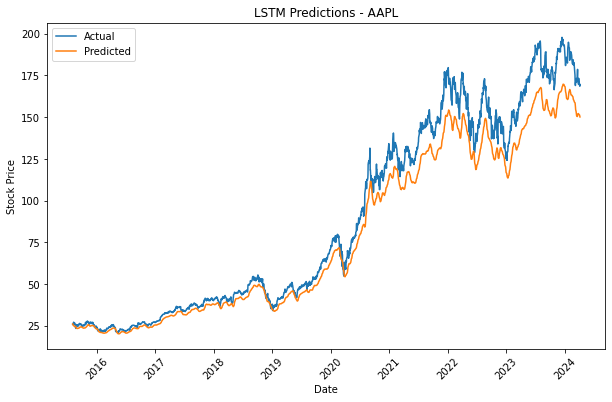

[*********************100%%**********************]  1 of 1 completed

Evaluating LSTM Performance for AAPL
Mean Squared Error (MSE): 166.59753793892747
Root Mean Squared Error (RMSE): 12.907266865565594
Mean Absolute Error (MAE): 9.73319763354923
R^2 Score: 0.9503745468104657


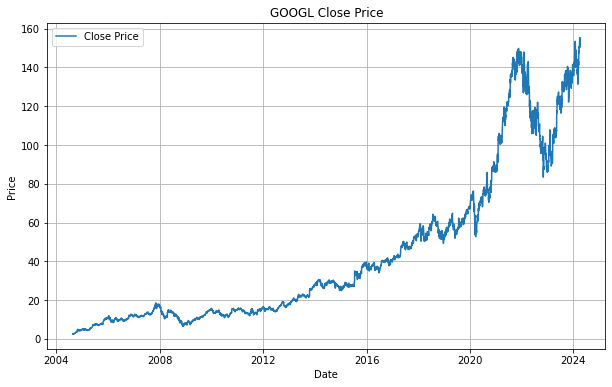

Epoch 1/10
111/111 - 4s - loss: 0.0019 - val_loss: 2.6216e-04 - 4s/epoch - 33ms/step
Epoch 2/10
111/111 - 1s - loss: 2.4228e-04 - val_loss: 2.1484e-04 - 569ms/epoch - 5ms/step
Epoch 3/10
111/111 - 1s - loss: 2.0756e-04 - val_loss: 2.5263e-04 - 570ms/epoch - 5ms/step
Epoch 4/10
111/111 - 1s - loss: 2.1940e-04 - val_loss: 3.0716e-04 - 569ms/epoch - 5ms/step
Epoch 5/10
111/111 - 1s - loss: 1.9630e-04 - val_loss: 2.7750e-04 - 573ms/epoch - 5ms/step
Epoch 6/10
111/111 - 1s - loss: 1.7858e-04 - val_loss: 2.3661e-04 - 571ms/epoch - 5ms/step
Epoch 7/10
111/111 - 1s - loss: 1.7798e-04 - val_loss: 2.8890e-04 - 569ms/epoch - 5ms/step
31/31 [==============================] - 0s 2ms/step


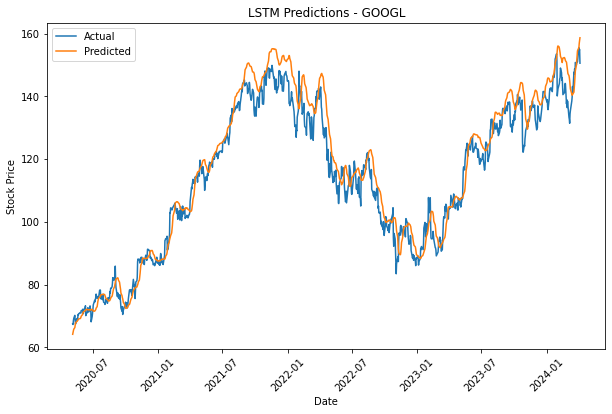

Evaluating LSTM Performance for GOOGL
Mean Squared Error (MSE): 31.32363070520549
Root Mean Squared Error (RMSE): 5.596751799499911
Mean Absolute Error (MAE): 4.264364377963857
R^2 Score: 0.9420257559324815


[*********************100%%**********************]  1 of 1 completed


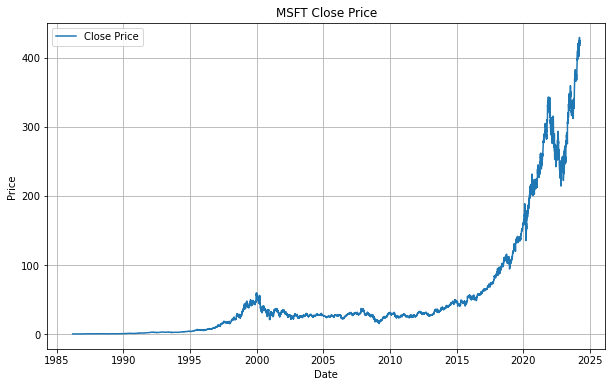

Epoch 1/10
216/216 - 5s - loss: 6.4004e-05 - val_loss: 3.4386e-04 - 5s/epoch - 23ms/step
Epoch 2/10
216/216 - 1s - loss: 1.4417e-05 - val_loss: 2.9149e-04 - 1s/epoch - 5ms/step
Epoch 3/10
216/216 - 1s - loss: 1.1554e-05 - val_loss: 2.0915e-04 - 1s/epoch - 6ms/step
Epoch 4/10
216/216 - 1s - loss: 1.2348e-05 - val_loss: 1.5615e-04 - 1s/epoch - 6ms/step
Epoch 5/10
216/216 - 1s - loss: 1.1340e-05 - val_loss: 1.4399e-04 - 1s/epoch - 6ms/step
Epoch 6/10
216/216 - 1s - loss: 1.0202e-05 - val_loss: 1.9048e-04 - 1s/epoch - 6ms/step
Epoch 7/10
216/216 - 1s - loss: 9.9873e-06 - val_loss: 1.2537e-04 - 1s/epoch - 6ms/step
Epoch 8/10
216/216 - 1s - loss: 1.0171e-05 - val_loss: 1.5023e-04 - 1s/epoch - 6ms/step
Epoch 9/10
216/216 - 1s - loss: 8.9620e-06 - val_loss: 1.8244e-05 - 1s/epoch - 6ms/step
Epoch 10/10
216/216 - 1s - loss: 8.6524e-06 - val_loss: 2.8826e-05 - 1s/epoch - 6ms/step
60/60 [==============================] - 1s 2ms/step


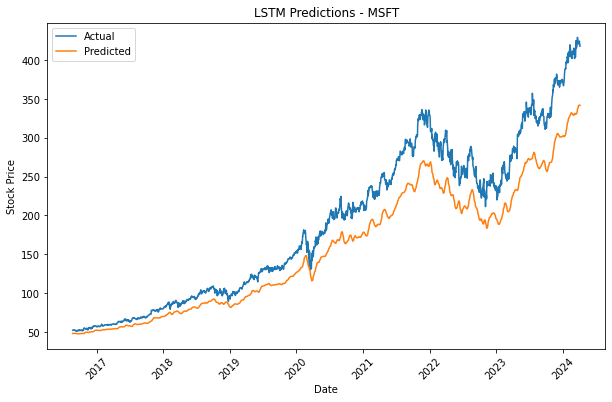

Evaluating LSTM Performance for MSFT
Mean Squared Error (MSE): 1587.1534327877432
Root Mean Squared Error (RMSE): 39.839094276699406
Mean Absolute Error (MAE): 33.18424618660813
R^2 Score: 0.8461281945877126


In [19]:
for symbol in symbols:
    dates, stock_data = get_stock_data(symbol)
    data = stock_data  # Assuming using only Close price for prediction
    
    # Normalize the data
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data)
    
    # Create sequences and targets
    X, y = create_sequences(data_scaled, sequence_length)
    
    # Split the data into training and testing sets
    split_ratio = 0.8
    split_index = int(split_ratio * len(X))
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]
    
    # Build the LSTM model with dropout for regularization
    lstm_model = Sequential([
        LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True),
        Dropout(0.2),  # Add dropout with a 20% rate
        LSTM(units=50),
        Dropout(0.2),  # Another dropout layer for additional regularization
        Dense(units=1)
    ])
    lstm_model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Adjusted early stopping callback to be more sensitive to overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    
    # Train the LSTM model with the updated early stopping callback
    lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=2, callbacks=[early_stopping])
    
    # Predict on the test set with the LSTM model
    predictions_scaled_lstm = lstm_model.predict(X_test)
    predictions_lstm = scaler.inverse_transform(predictions_scaled_lstm)
    y_test_original = scaler.inverse_transform(y_test)
    # y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))  # Ensure correct shape
    
    # Plot actual vs. predicted values for LSTM
    # adjusted_dates = dates[split_index + sequence_length:split_index + sequence_length + len(y_test_original)]
    plot_predictions_with_dates(dates[split_index + sequence_length:], y_test_original, predictions_lstm, f'LSTM Predictions - {symbol}')
    
    # Evaluate LSTM model performance with additional metrics
    print(f'Evaluating LSTM Performance for {symbol}')
    evaluate_model_performance(y_test_original, predictions_lstm)